['77,629,887', '77,220,084', '76,858,557', '76,534,826', '76,194,674', '75,815,108', '75,428,316', '75,060,465', '74,641,518', '74,081,981', '73,346,427', '72,486,891', '71,548,760', '70,485,490', '69,273,640', '67,886,011']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


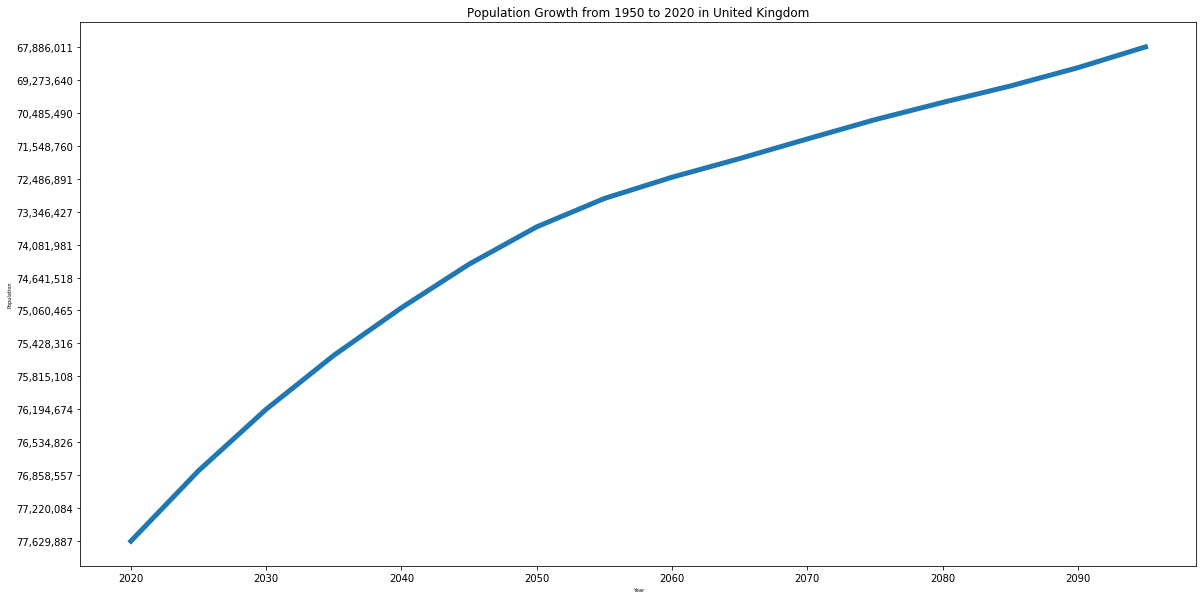

In [2]:
from selenium import webdriver
import bs4
import matplotlib.pyplot as plt
import numpy as np


def get_country_data(country):
    base_url = 'https://worldpopulationreview.com'
    browser = webdriver.Firefox()
    browser.get(base_url)
    browser.implicitly_wait(3)

    search_field = browser.find_element_by_id('website-search')
    search_field.send_keys(country)
    search_field.submit()
    browser.implicitly_wait(3)

    search_result = browser.find_element_by_id("search_results")
    result_table = search_result.find_element_by_id("content")
    result = result_table.find_element_by_link_text(country)
    result.click()
    browser.find_element_by_link_text(country).click()
    browser.implicitly_wait(3)

    page_source = browser.page_source
    soup = bs4.BeautifulSoup(page_source, 'html.parser')

    content = soup.find_all('div', {"class": "datatableStyles__TableContainer-bwtkle-0 dvLKHZ"})
    rows = content[2].find_all('tr')
    rows.pop(0)

    years = []

    for row in rows:
        datas = row.find_all('td')
        rowl = []
        #print(datas)
        for data in datas:   
            value = str(data)
            x = value.split(">")
            y = x[1].split("<")
            rowl.append(y[0])
        rowl.pop(len(rowl)-1)
        years.append(rowl)
    
    indexes_mask = [x[0] for x in list(reversed(years))]
    population_mask = [x[1] for x in list(reversed(years))]

    population_index = np.arange(len(population_mask))
    print(population_mask)
    print(population_index)
    
    indexes = []
    for row in indexes_mask:
        indexes.append(int(row))

    population = []
    for row in population_mask:
        row = row.replace(',', '')
        population.append(int(row))

    plt.figure(figsize=(20,10))
    plt.plot(indexes, population, linewidth=5)
    plt.yticks(np.linspace( min(population), max(population), len(population_mask), population_mask), population_mask )
    plt.xlabel("Year", fontsize=5)
    plt.ylabel("Population", fontsize=5)
    plt.title('Population Growth from 1950 to 2020 in ' + country)
    plt.show() 

      
get_country_data("United Kingdom")